In [46]:
import ipywidgets as widgets
from IPython.display import display

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def load_data():  
    return pd.read_excel(r'../data/BQ-Assignment-Data-Analytics.xlsx')  

sales_data = load_data()

In [4]:
sales_data

Item Type         Item  Item Sort Order       Date  Sales
0       Fruit   Strawberry                1 2020-01-01     41
1       Fruit   Strawberry                1 2020-02-01     41
2       Fruit   Strawberry                1 2020-03-01     40
3       Fruit   Strawberry                1 2020-04-01     40
4       Fruit   Strawberry                1 2020-05-01     44
5       Fruit        Apple                2 2020-01-01     11
6       Fruit        Apple                2 2020-02-01     20
7       Fruit        Apple                2 2020-03-01     11
8       Fruit        Apple                2 2020-04-01     12
9       Fruit        Apple                2 2020-05-01     11
10      Fruit       Lychee                3 2020-01-01     76
11      Fruit       Lychee                3 2020-02-01     80
12      Fruit       Lychee                3 2020-03-01     78
13      Fruit       Lychee                3 2020-04-01     74
14      Fruit       Lychee                3 2020-05-01     72
15      Fruit     Cherries                4 2020-01-01     87
16      Fruit     Cherries                4 2020-02-01     88
17      Fruit     Cherries                4 2020-03-01     86
18      Fruit     Cherries                4 2020-04-01     86
19      Fruit     Cherries                4 2020-05-01     96
20  Vegetable      Spinach                5 2020-01-01    235
21  Vegetable      Spinach                5 2020-02-01    214
22  Vegetable      Spinach                5 2020-03-01    285
23  Vegetable      Spinach                5 2020-04-01    209
24  Vegetable      Spinach                5 2020-05-01    291
25  Vegetable       Carrot                6 2020-01-01     15
26  Vegetable       Carrot                6 2020-02-01     29
27  Vegetable       Carrot                6 2020-03-01     14
28  Vegetable       Carrot                6 2020-04-01     25
29  Vegetable       Carrot                6 2020-05-01     16
30  Vegetable     Broccoli                7 2020-01-01     43
31  Vegetable     Broccoli                7 2020-02-01     39
32  Vegetable     Broccoli                7 2020-03-01     31
33  Vegetable     Broccoli                7 2020-04-01     52
34  Vegetable     Broccoli                7 2020-05-01     40
35  Vegetable  Cauliflower                8 2020-01-01     18
36  Vegetable  Cauliflower                8 2020-02-01     16
37  Vegetable  Cauliflower                8 2020-03-01     27
38  Vegetable  Cauliflower                8 2020-04-01     24
39  Vegetable  Cauliflower                8 2020-05-01     27

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Item Type        40 non-null     object        
 1   Item             40 non-null     object        
 2   Item Sort Order  40 non-null     int64         
 3   Date             40 non-null     datetime64[ns]
 4   Sales            40 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.7+ KB


In [6]:
sales_data.rename(columns=lambda x: x.replace(' ', '_'),inplace=True)
sales_data.columns= sales_data.columns.str.lower()

In [7]:
sales_data.head()

item_type        item  item_sort_order       date  sales
0     Fruit  Strawberry                1 2020-01-01     41
1     Fruit  Strawberry                1 2020-02-01     41
2     Fruit  Strawberry                1 2020-03-01     40
3     Fruit  Strawberry                1 2020-04-01     40
4     Fruit  Strawberry                1 2020-05-01     44

In [44]:
sales_data['item_type'].value_counts()

Vegetable    20
Fruit        20
Name: item_type, dtype: int64

In [50]:
#Dropdown for Item type

In [60]:
ALL = 'ALL'
SELECT = 'Select Item Type'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    unique.insert(0, SELECT)
    return unique

unique_sorted_values_plus_ALL(sales_data.item_type)

['Select Item Type', 'ALL', 'Fruit', 'Vegetable']

In [61]:
dropdown_item_type = widgets.Dropdown(options = unique_sorted_values_plus_ALL(sales_data.item_type))

output_item_type = widgets.Output()


def dropdown_item_eventhandler(change):
    output_item_type.clear_output()
    with output_item_type:
        if (change.new == SELECT):
            display('Select Item Types')
        elif(change.new == ALL):
            display(sales_data)
            
        else:
            display(sales_data[sales_data.item_type == change.new])        
        

dropdown_item_type.observe(dropdown_item_eventhandler, names='value')
display(dropdown_item_type)
display(output_item_type)

Dropdown(options=('Select Item Type', 'ALL', 'Fruit', 'Vegetable'), value='Select Item Type')

Output()

In [54]:
#drop down for items

In [65]:
ALL1 = 'ALL'
SELECT_I = 'Select Item'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL1)
    unique.insert(0, SELECT_I)
    return unique

unique_sorted_values_plus_ALL(sales_data.item)

['Select Item',
 'ALL',
 'Apple',
 'Broccoli',
 'Carrot',
 'Cauliflower',
 'Cherries',
 'Lychee',
 'Spinach',
 'Strawberry']

In [67]:
dropdown_item = widgets.Dropdown(options = unique_sorted_values_plus_ALL_item(sales_data.item))

output_item = widgets.Output()


def dropdown_item_eventhandler(change):
    output_item.clear_output()
    with output_item:
        if (change.new == SELECT_I):
            display('Select Items')
        elif(change.new == ALL1):
            display(sales_data)
            
        else:
            display(sales_data[sales_data.item == change.new])        
        

dropdown_item.observe(dropdown_item_eventhandler, names='value')
display(dropdown_item)
display(output_item)

Dropdown(options=('Select Item', 'ALL', 'Apple', 'Broccoli', 'Carrot', 'Cauliflower', 'Cherries', 'Lychee', 'S…

Output()

In [8]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-4])
    monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
    monthly_data.date = pd.to_datetime(monthly_data.date)
    return monthly_data

In [9]:
monthly_df = monthly_sales(sales_data)
monthly_df

date  sales
0 2020-01-01    526
1 2020-02-01    527
2 2020-03-01    572
3 2020-04-01    522
4 2020-05-01    597

In [ ]:
month=['Jan','Feb','Mar','Apr','May']


In [10]:
def daily_sales(data):
    daily_data = data.copy()
    daily_data.date = daily_data.date.apply(lambda x: str(x)[:-4])
    daily_data=daily_data[['date','sales']]
    daily_data.date = pd.to_datetime(daily_data.date)
    return daily_data

In [11]:
daily_df = daily_sales(sales_data)
daily_df.head(10)

date  sales
0 2020-01-01     41
1 2020-02-01     41
2 2020-03-01     40
3 2020-04-01     40
4 2020-05-01     44
5 2020-01-01     11
6 2020-02-01     20
7 2020-03-01     11
8 2020-04-01     12
9 2020-05-01     11

In [12]:
#EDA

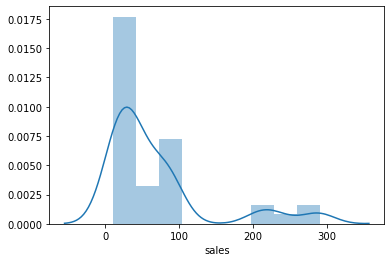

In [70]:
sns.distplot(sales_data['sales'])

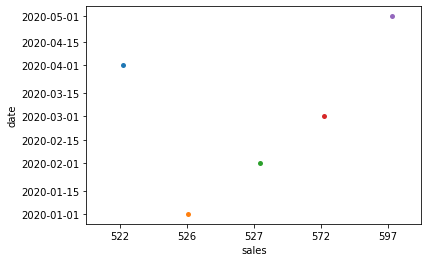

In [74]:
sns.stripplot(monthly_df['sales'], monthly_df['date'])

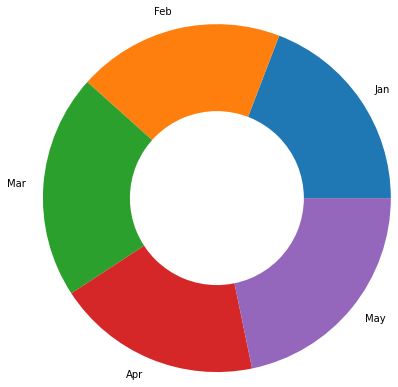

In [113]:
plt.pie(monthly_df.sales,labels=month,radius=2, frame=True)
plt.pie([1],colors=['w'],radius=1)
plt.show()

In [13]:
# Duration of dataset
def sales_duration(data):
    data.date = pd.to_datetime(data.date)
    number_of_days = data.date.max() - data.date.min()
    number_of_months=number_of_days.days / 30
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(round(number_of_months,2), 'months')
    print(round(number_of_years,2), 'years')
    
sales_duration(sales_data)

121 days
4.03 months
0.33 years


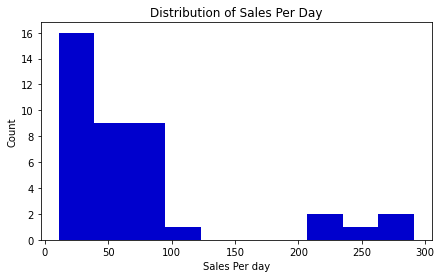

In [14]:
def sales_per_day():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(sales_data.sales, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales Per Day")
    
sales_per_day()

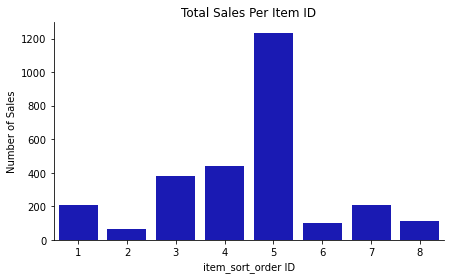

In [15]:
def sales_per_item_sort_id():
    by_item_sort_order = sales_data.groupby('item_sort_order')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(7,4))
    sns.barplot(by_item_sort_order.item_sort_order, by_item_sort_order.sales, color='mediumblue')
    
    ax.set(xlabel = "item_sort_order ID",
           ylabel = "Number of Sales",
           title = "Total Sales Per Item ID")
    
    sns.despine()
    
sales_per_item_sort_id()

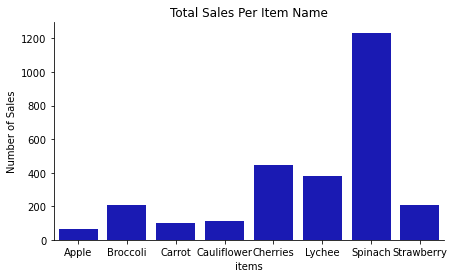

In [16]:
def sales_per_item():
    by_item = sales_data.groupby('item')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(7,4))
    sns.barplot(by_item.item, by_item.sales, color='mediumblue')
    
    ax.set(xlabel = "items",
           ylabel = "Number of Sales",
           title = "Total Sales Per Item Name")
    
    sns.despine()
    
sales_per_item()

In [17]:
# Average monthly sales

# Overall
avg_monthly_sales = monthly_df.sales.mean()
print(f"Overall average monthly sales: ₹ {avg_monthly_sales}/-")

Overall average monthly sales: ₹ 548.8/-


In [18]:
#Determining Stationarity¶

In [19]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    second = data.groupby(data.date)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%m')
    sns.lineplot(second.date, y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()

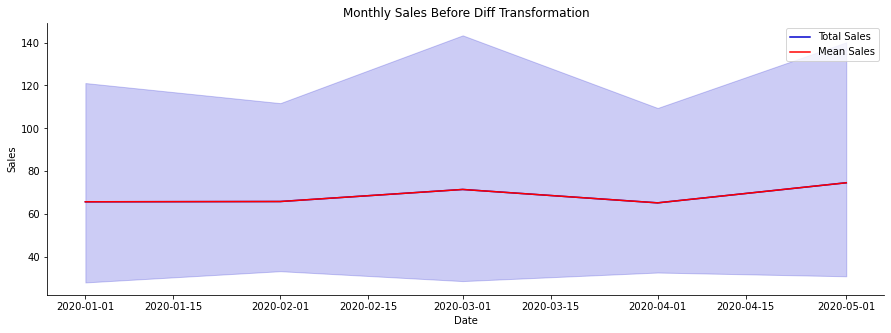

In [20]:
time_plot(daily_df, 'date', 'sales', 'Monthly Sales Before Diff Transformation')


In [30]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('../data/stationary_df.csv')
    return data

In [31]:
stationary_df = get_diff(daily_df)

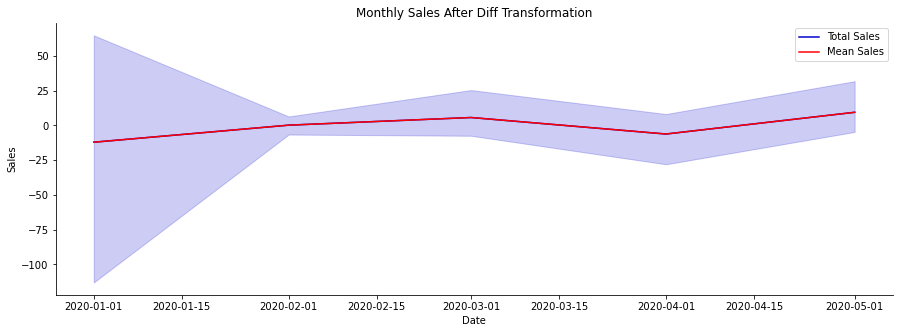

In [32]:
time_plot(stationary_df, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

In [33]:
# Observing lags

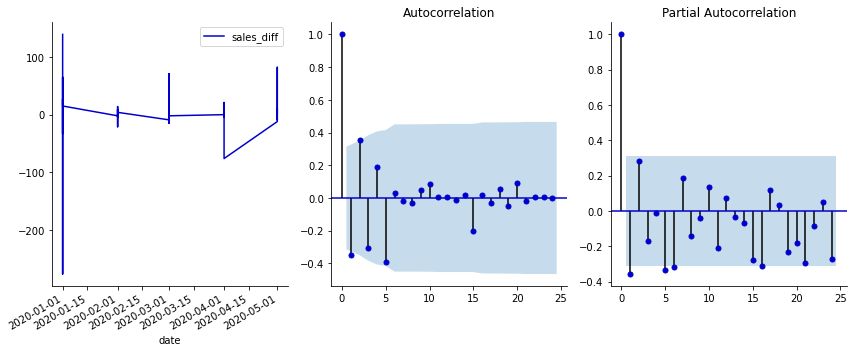

In [34]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=24);

In [26]:
#Preparing Data set Modelling

In [27]:
#regressive Modelling

In [35]:
#creating dataframe for transformation from time series to supervised data
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    supervised_df.to_csv('../data/model_df.csv', index=False)
    
    return supervised_df

In [36]:
model_df = generate_supervised(stationary_df)

In [37]:
model_df

date  sales  sales_diff  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  \
0  2020-04-01     74        -4.0   -2.0    4.0   65.0   -1.0    1.0   -9.0   
1  2020-05-01     72        -2.0   -4.0   -2.0    4.0   65.0   -1.0    1.0   
2  2020-01-01     87        15.0   -2.0   -4.0   -2.0    4.0   65.0   -1.0   
3  2020-02-01     88         1.0   15.0   -2.0   -4.0   -2.0    4.0   65.0   
4  2020-03-01     86        -2.0    1.0   15.0   -2.0   -4.0   -2.0    4.0   
5  2020-04-01     86         0.0   -2.0    1.0   15.0   -2.0   -4.0   -2.0   
6  2020-05-01     96        10.0    0.0   -2.0    1.0   15.0   -2.0   -4.0   
7  2020-01-01    235       139.0   10.0    0.0   -2.0    1.0   15.0   -2.0   
8  2020-02-01    214       -21.0  139.0   10.0    0.0   -2.0    1.0   15.0   
9  2020-03-01    285        71.0  -21.0  139.0   10.0    0.0   -2.0    1.0   
10 2020-04-01    209       -76.0   71.0  -21.0  139.0   10.0    0.0   -2.0   
11 2020-05-01    291        82.0  -76.0   71.0  -21.0  139.0   10.0    0.0   
12 2020-01-01     15      -276.0   82.0  -76.0   71.0  -21.0  139.0   10.0   
13 2020-02-01     29        14.0 -276.0   82.0  -76.0   71.0  -21.0  139.0   
14 2020-03-01     14       -15.0   14.0 -276.0   82.0  -76.0   71.0  -21.0   
15 2020-04-01     25        11.0  -15.0   14.0 -276.0   82.0  -76.0   71.0   
16 2020-05-01     16        -9.0   11.0  -15.0   14.0 -276.0   82.0  -76.0   
17 2020-01-01     43        27.0   -9.0   11.0  -15.0   14.0 -276.0   82.0   
18 2020-02-01     39        -4.0   27.0   -9.0   11.0  -15.0   14.0 -276.0   
19 2020-03-01     31        -8.0   -4.0   27.0   -9.0   11.0  -15.0   14.0   
20 2020-04-01     52        21.0   -8.0   -4.0   27.0   -9.0   11.0  -15.0   
21 2020-05-01     40       -12.0   21.0   -8.0   -4.0   27.0   -9.0   11.0   
22 2020-01-01     18       -22.0  -12.0   21.0   -8.0   -4.0   27.0   -9.0   
23 2020-02-01     16        -2.0  -22.0  -12.0   21.0   -8.0   -4.0   27.0   
24 2020-03-01     27        11.0   -2.0  -22.0  -12.0   21.0   -8.0   -4.0   
25 2020-04-01     24        -3.0   11.0   -2.0  -22.0  -12.0   21.0   -8.0   
26 2020-05-01     27         3.0   -3.0   11.0   -2.0  -22.0  -12.0   21.0   

    lag_7  lag_8  lag_9  lag_10  lag_11  lag_12  
0     9.0  -33.0    4.0     0.0    -1.0     0.0  
1    -9.0    9.0  -33.0     4.0     0.0    -1.0  
2     1.0   -9.0    9.0   -33.0     4.0     0.0  
3    -1.0    1.0   -9.0     9.0   -33.0     4.0  
4    65.0   -1.0    1.0    -9.0     9.0   -33.0  
5     4.0   65.0   -1.0     1.0    -9.0     9.0  
6    -2.0    4.0   65.0    -1.0     1.0    -9.0  
7    -4.0   -2.0    4.0    65.0    -1.0     1.0  
8    -2.0   -4.0   -2.0     4.0    65.0    -1.0  
9    15.0   -2.0   -4.0    -2.0     4.0    65.0  
10    1.0   15.0   -2.0    -4.0    -2.0     4.0  
11   -2.0    1.0   15.0    -2.0    -4.0    -2.0  
12    0.0   -2.0    1.0    15.0    -2.0    -4.0  
13   10.0    0.0   -2.0     1.0    15.0    -2.0  
14  139.0   10.0    0.0    -2.0     1.0    15.0  
15  -21.0  139.0   10.0     0.0    -2.0     1.0  
16   71.0  -21.0  139.0    10.0     0.0    -2.0  
17  -76.0   71.0  -21.0   139.0    10.0     0.0  
18   82.0  -76.0   71.0   -21.0   139.0    10.0  
19 -276.0   82.0  -76.0    71.0   -21.0   139.0  
20   14.0 -276.0   82.0   -76.0    71.0   -21.0  
21  -15.0   14.0 -276.0    82.0   -76.0    71.0  
22   11.0  -15.0   14.0  -276.0    82.0   -76.0  
23   -9.0   11.0  -15.0    14.0  -276.0    82.0  
24   27.0   -9.0   11.0   -15.0    14.0  -276.0  
25   -4.0   27.0   -9.0    11.0   -15.0    14.0  
26   -8.0   -4.0   27.0    -9.0    11.0   -15.0

In [38]:
# Arima _ modeling

In [42]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    dt_data.to_csv('../data/arima_df.csv')
    
    return dt_data

In [40]:
datetime_df = generate_arima_data(stationary_df)

In [41]:
datetime_df

sales_diff
date                  
2020-02-01         0.0
2020-03-01        -1.0
2020-04-01         0.0
2020-05-01         4.0
2020-01-01       -33.0
2020-02-01         9.0
2020-03-01        -9.0
2020-04-01         1.0
2020-05-01        -1.0
2020-01-01        65.0
2020-02-01         4.0
2020-03-01        -2.0
2020-04-01        -4.0
2020-05-01        -2.0
2020-01-01        15.0
2020-02-01         1.0
2020-03-01        -2.0
2020-04-01         0.0
2020-05-01        10.0
2020-01-01       139.0
2020-02-01       -21.0
2020-03-01        71.0
2020-04-01       -76.0
2020-05-01        82.0
2020-01-01      -276.0
2020-02-01        14.0
2020-03-01       -15.0
2020-04-01        11.0
2020-05-01        -9.0
2020-01-01        27.0
2020-02-01        -4.0
2020-03-01        -8.0
2020-04-01        21.0
2020-05-01       -12.0
2020-01-01       -22.0
2020-02-01        -2.0
2020-03-01        11.0
2020-04-01        -3.0
2020-05-01         3.0